<a href="https://colab.research.google.com/github/afaheem01/Linear_Regression/blob/main/Simple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression**
Used to find the relationship between one independent and dependent features.

Libraries:
1. import numpy as np
2. import pandas as pd
3. import matplotlib.pyplot as plt
4. import seaborn as sns
5. from sklearn.model_selection import train_test_split
6. from sklearn.preprocessing import StandardScaler
7. from sklearn.metrics import mean_squared_error,mean_absolute_error
8. import statsmodels.api as sm


Results:
If r2 or rsquared error is close to 1 then it will consider as a good model.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Upload data sets.

df = pd.read_csv("/content/height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height Vs Weight')

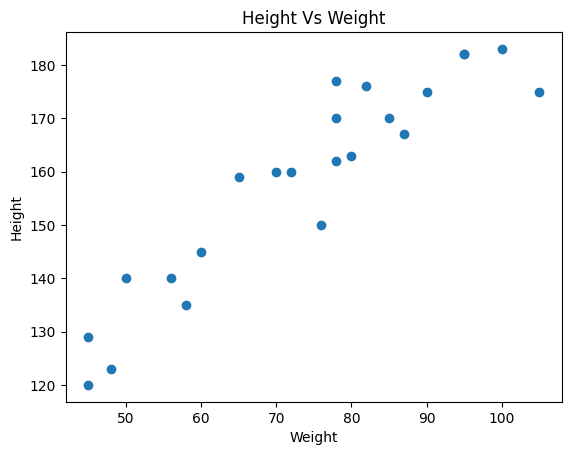

In [6]:
7# Draw scatter plot to check the data is linear or non linear.

plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height Vs Weight')



In [ ]:
# To find the corelation between two columns.

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


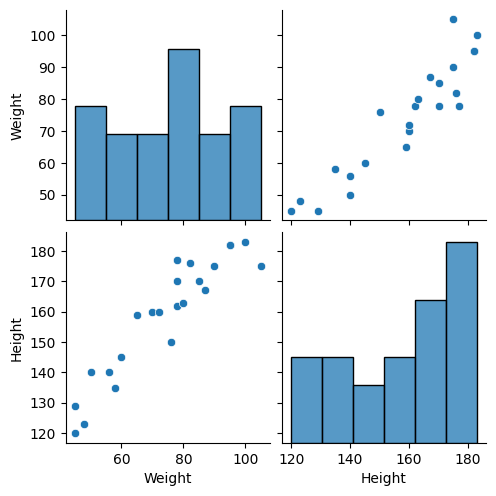

In [ ]:
sns.pairplot(df)

In [ ]:
# Initialize independent and dependent features.
# independent features should be data frame or 2 dimesnionalarray

x = df[['Weight']]
y = df[['Height']]

In [ ]:
print(type(x) , type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
# Import train and test

from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25, random_state=45)

In [ ]:
x_test

,Height
2,123
18,150
17,159
22,160
7,175
8,182
6,163
9,170
5,162
14,170


In [ ]:
# standardizing to get the values between 0 and 1

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [ ]:

x_train

array([[-1.64862706],
       [ 0.25148548],
       [-0.4949873 ],
       [-0.01995917],
       [ 1.20154176],
       [ 1.54084757],
       [ 0.52293013],
       [ 0.38720781],
       [ 0.38720781],
       [ 0.86223595],
       [-0.97001544],
       [ 0.38720781],
       [-0.15568149],
       [-1.10573776],
       [-1.85221055],
       [-0.83429311],
       [ 1.54084757]])

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[ 2.21945919],
       [ 0.99795827],
       [-1.51290474],
       [ 1.88015338],
       [-1.85221055],
       [ 0.65865246]])

In [ ]:
# Apply linear regression.

from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print(regression.coef_)
print(regression.intercept_)

[[17.59928761]]
[157.23529412]


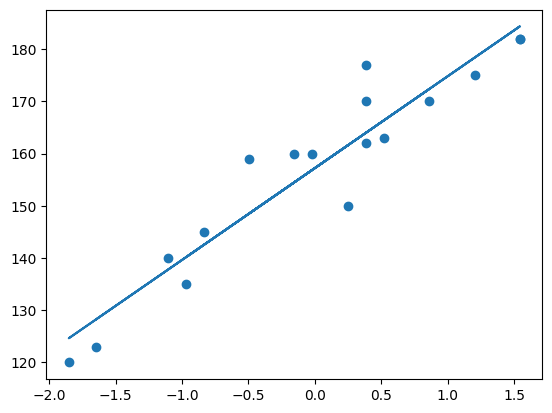

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train, regression.predict(x_train))

In [ ]:
# Prediction of test data:
#y(pred)= mx + C

In [ ]:
y_pred = regression.predict(x_test)

In [ ]:
y_pred

array([[196.29619479],
       [174.79864873],
       [130.60924852],
       [190.32465422],
       [124.63770795],
       [168.82710816]])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  121.11059607743948
mae:  9.557572184332976
rmse:  11.005025946241085


In [ ]:
# Finding R-Squared value (r2 score)

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

0.6976434494599292


In [ ]:
r_adjust = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test[1]-1)

In [ ]:
r_adjust

array([0.62224713])

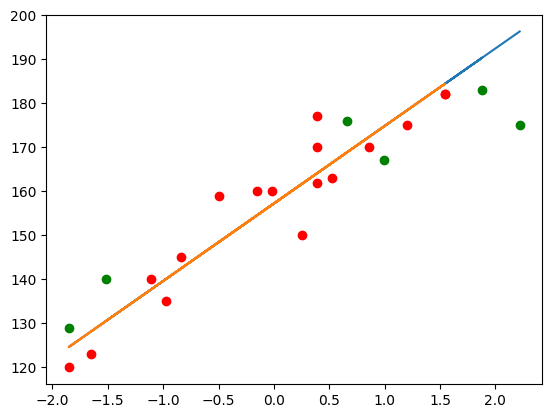

In [ ]:
plt.scatter(x_test, y_test, c='g')
plt.plot(x_test,regression.predict(x_test))

plt.scatter(x_train,y_train, c="r")
plt.plot(x_train, regression.predict(x_train))

In [ ]:
## OLS Linear Regression

import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train, x_train).fit()

In [ ]:
prediction = model.predict(x_test)
print(prediction)

[ 39.06090067  17.56335462 -26.6260456   33.0893601  -32.59758617
  11.59181405]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2002
Date:                Fri, 14 Jun 2024   Prob (F-statistic):                       0.661
Time:                        16:12:32   Log-Likelihood:                         -110.12
No. Observations:                  17   AIC:                                      222.2
Df Residuals:                      16   BIC:                                      223.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
